In [1]:
import numpy as np
import pandas as pd
import argparse
from simulate import generate_exgauss_sampler_from_fit
import seaborn as sns
import matplotlib.pyplot as plt

from utils import SimulateData

from sympy.solvers import solve
from sympy import Symbol

In [2]:
def add_identity(axes, *line_args, **line_kwargs):
    identity, = axes.plot([], [], *line_args, **line_kwargs)
    def callback(axes):
        low_x, high_x = axes.get_xlim()
        low_y, high_y = axes.get_ylim()
        low = max(low_x, low_y)
        high = min(high_x, high_y)
        identity.set_data([low, high], [low, high])
    callback(axes)
    axes.callbacks.connect('xlim_changed', callback)
    axes.callbacks.connect('ylim_changed', callback)
    return axes

In [3]:
# (580 - 50) * mu_go = 100
# (580 - 50) / 100 = 1/ mu_go
# 100/(580-59) = mu_go
mu_go = 100/(580-50)
mu_go

0.18867924528301888

In [4]:
g = Symbol('g')
go_sol = solve((580 - 50) * g - 100, g)
print(go_sol)
10/53

[10/53]


0.18867924528301888

In [5]:
n_trials = 500
n_ssd0_trials = 5000
nsubs = 50
low_rt = 250
high_rt = 750
subs = np.random.uniform(low_rt, high_rt, size=nsubs)

go_noises = np.arange(0.5, 4, .25)

/Users/henrymj/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


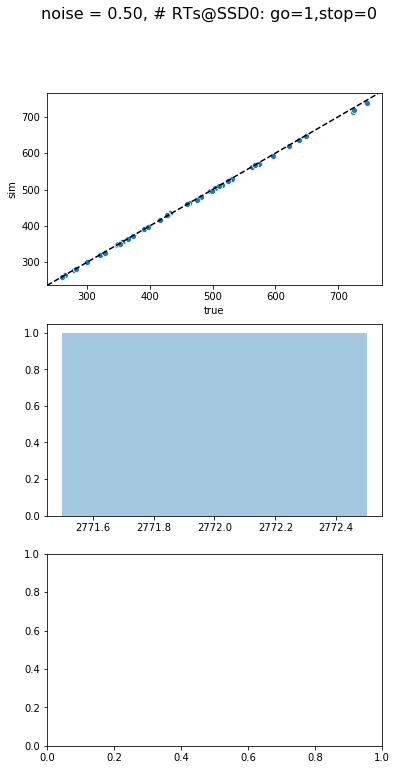

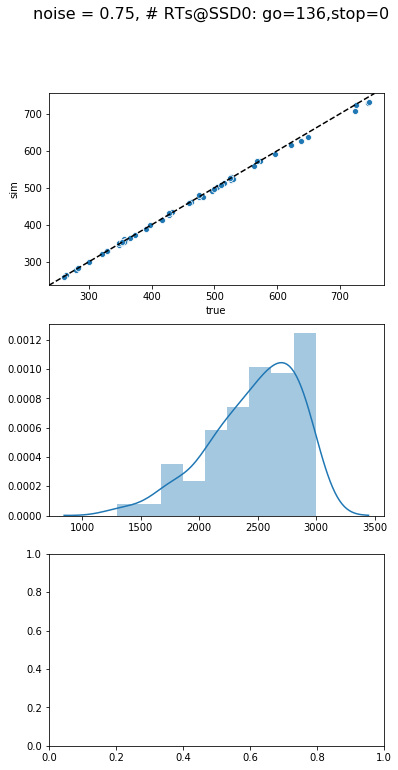

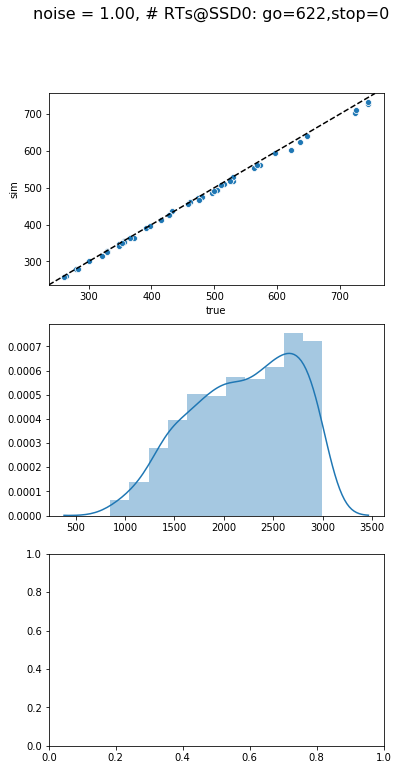

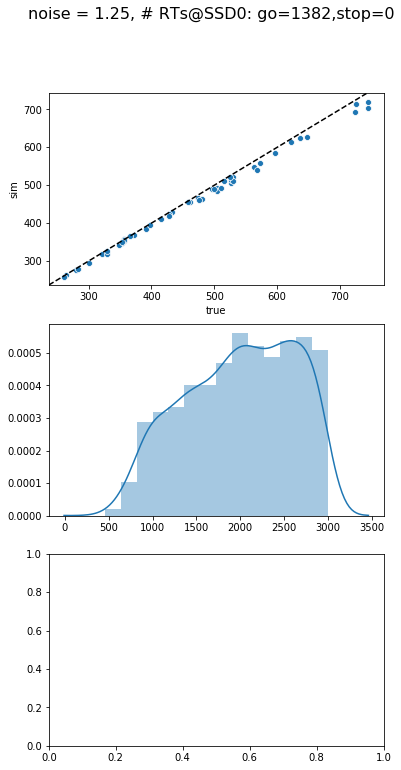

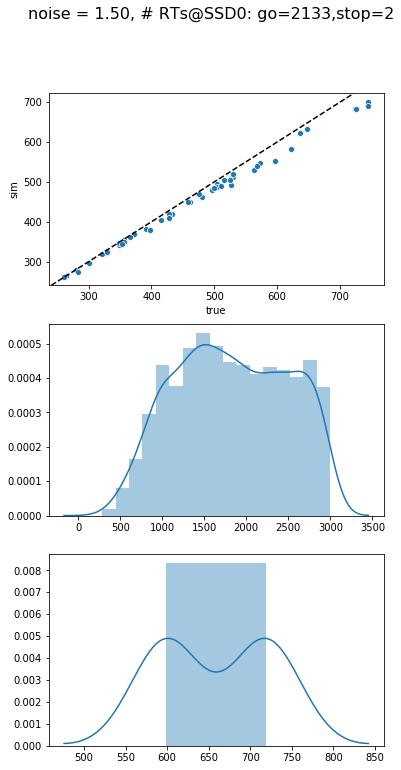

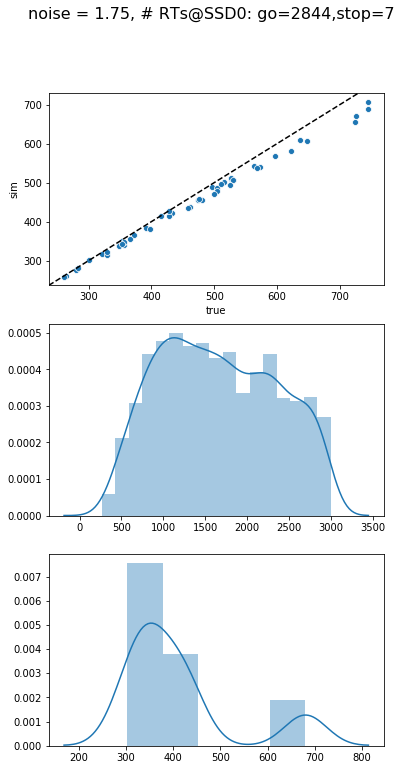

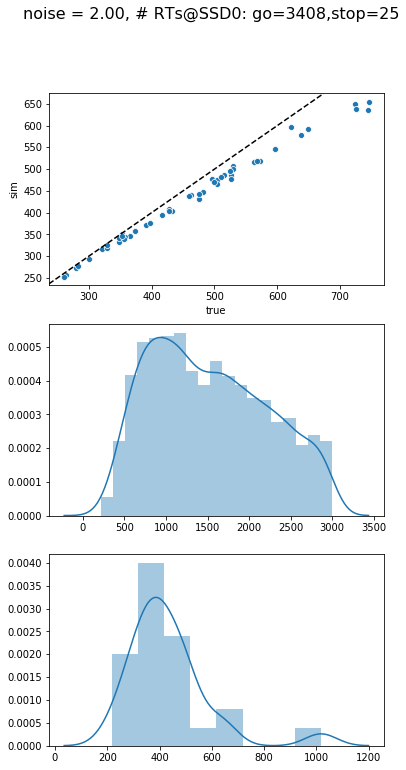

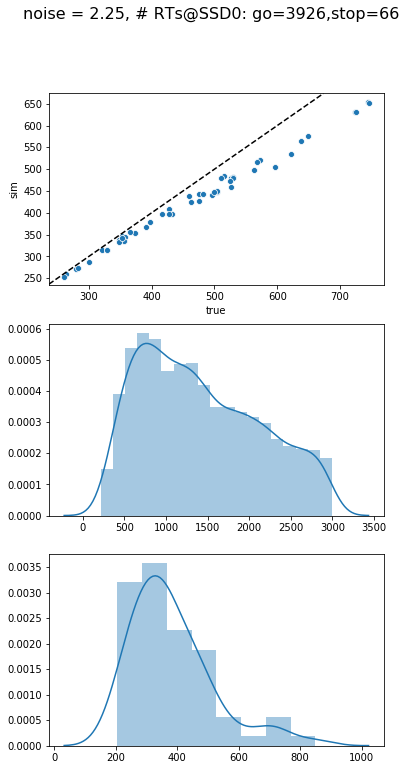

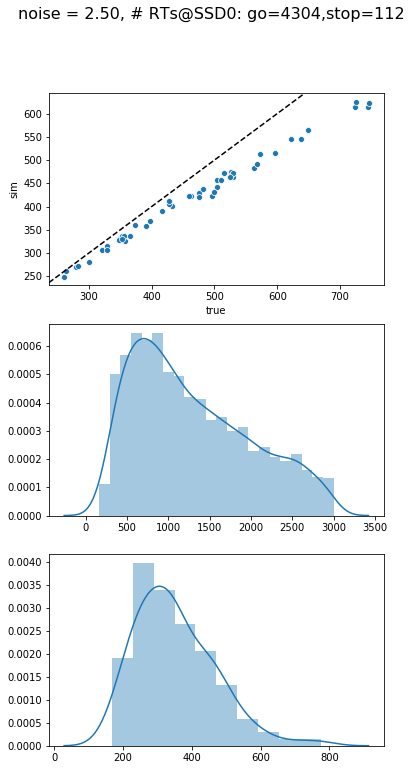

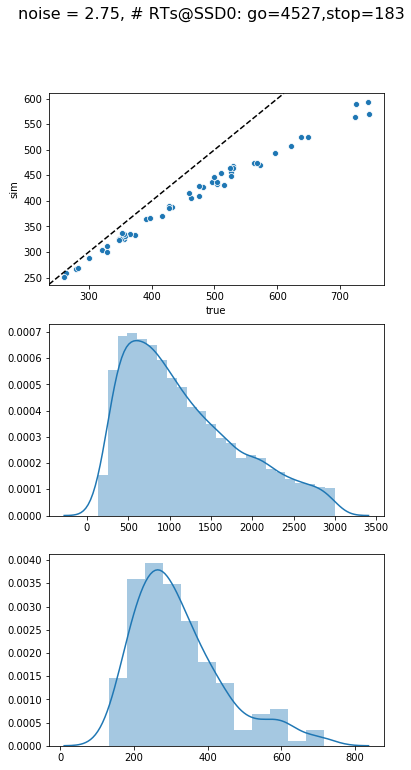

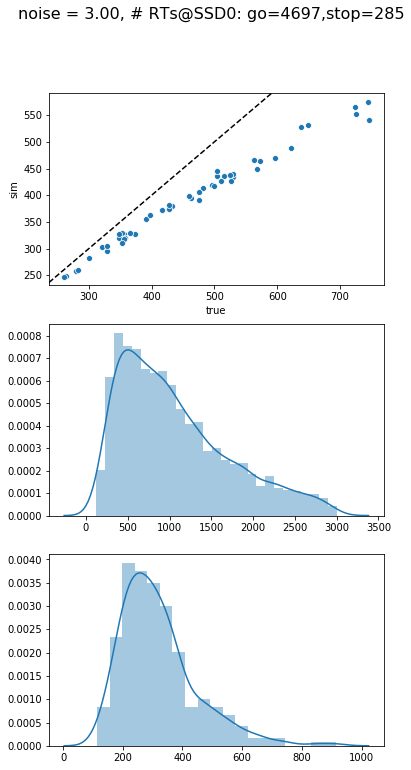

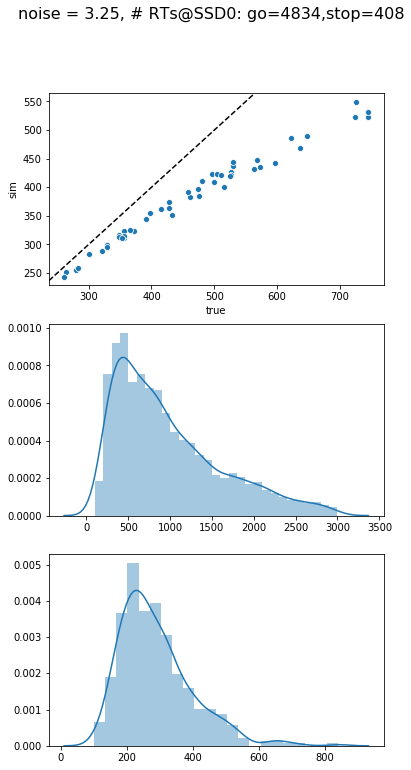

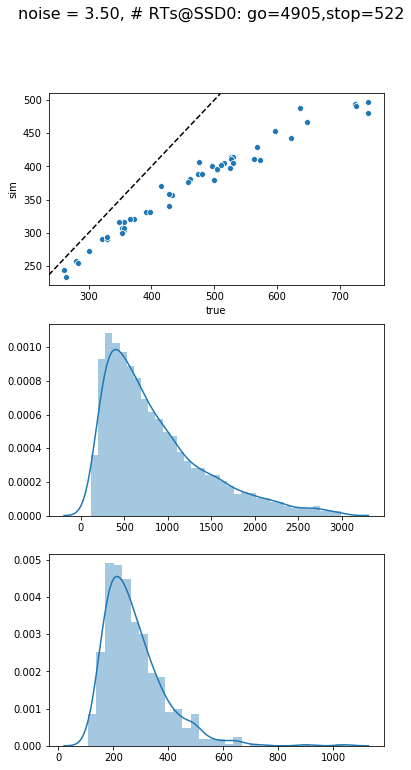

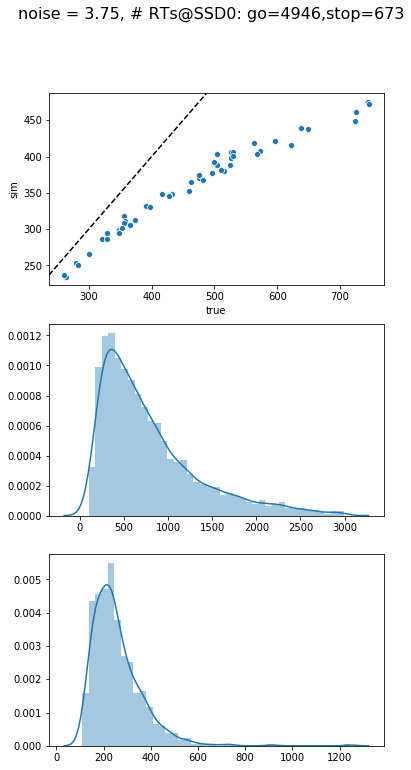

In [6]:
for noise_go in go_noises:
    fig, axes = plt.subplots(3, 1, figsize=(6,12))
    rts = {'true': [],
           'sim': []}
    for ground_truth in subs:
        mu_go = 100/(ground_truth-50)
        simulator = SimulateData()
        params = simulator._init_params({'mu_go': mu_go, 'noise_go': noise_go})
        params['n_trials_stop'] = 0
        params['n_trials_go'] = n_trials

        simulator._set_n_trials(params)
        simulator._set_n_guesses(params)  # no guessing is happening

        data_dict = simulator._simulate_go_trials(simulator._init_data_dict(),
                                                  params)
        rts['true'].append(ground_truth)
        rts['sim'].append(np.nanmean(data_dict['RT']))

    ax = sns.scatterplot(x='true', y='sim', data=pd.DataFrame(rts), ax=axes[0])
    _ = add_identity(ax, color='k', ls='--')

    # simulate an example w/ mu_go = 0 at this noise threshold
    simulator = SimulateData()
    params = simulator._init_params({'mu_go': 0, 'noise_go': noise_go})
    params['n_trials_stop'] = n_ssd0_trials
    params['n_trials_go'] = n_ssd0_trials

    simulator._set_n_trials(params)
    simulator._set_n_guesses(params)  # no guessing is happening

    # GO TRIALS
    go_dict = simulator._simulate_go_trials(simulator._init_data_dict(),
                                              params)
    count_go_rts = np.sum(~np.isnan(go_dict['RT']))
    if  count_go_rts > 0:
        sns.distplot(go_dict['RT'], ax=axes[1])
        
        
    # STOP TRIALS @ SSD = 0
    stop_dict = simulator._simulate_stop_trials(simulator._init_data_dict(),
                                          params, 0)
    count_stop_rts = np.sum(~np.isnan(stop_dict['RT']))
    if  count_stop_rts > 0:
        sns.distplot(stop_dict['RT'], ax=axes[2])

    _ = fig.suptitle('noise = %.2f, # RTs@SSD0: go=%d,stop=%d' % (noise_go, count_go_rts, count_stop_rts), fontsize=16)
    plt.show()
    plt.close()

/Users/henrymj/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/Users/henrymj/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


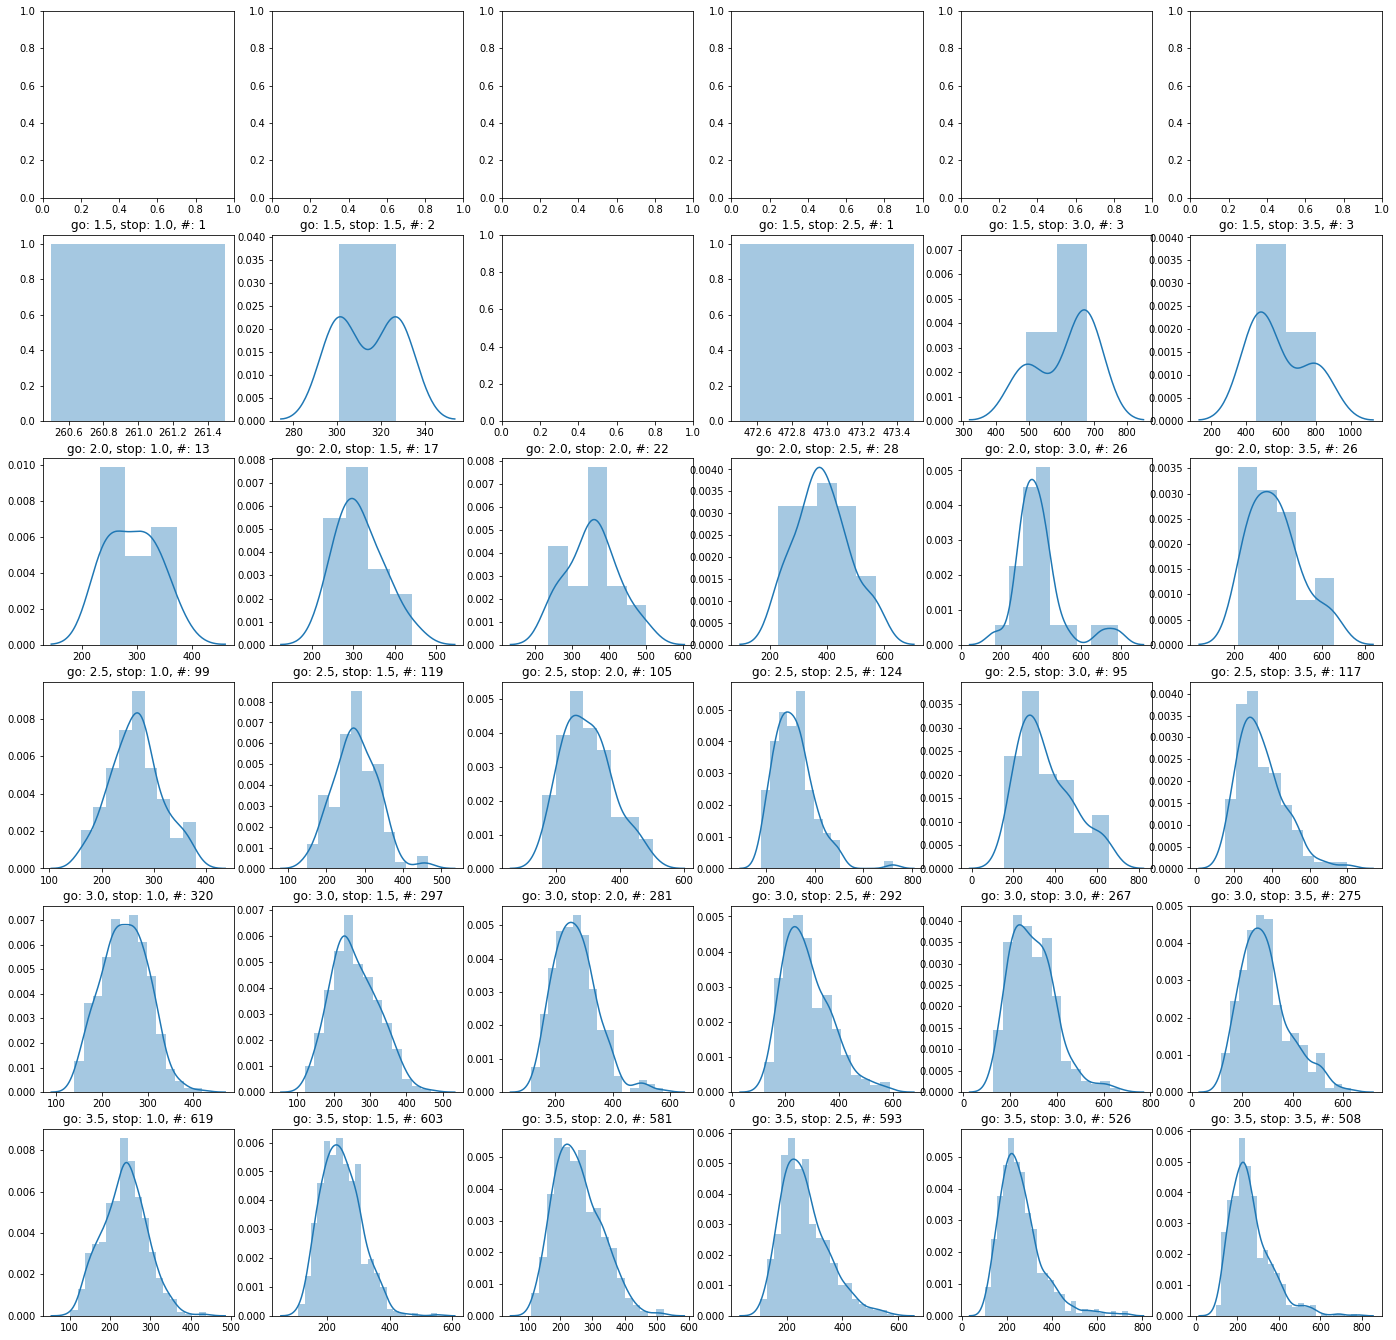

In [7]:
go_noises = np.arange(1, 4, .5)
stop_noises = np.arange(1, 4, .5)

fig, axes = plt.subplots(len(go_noises), len(stop_noises), figsize=(24,24))

for idx_row, noise_go in enumerate(go_noises):
    for idx_col, noise_stop in enumerate(stop_noises):
        # simulate an example w/ mu_go = 0 at this noise threshold
        simulator = SimulateData()
        params = simulator._init_params({'mu_go': 0, 'noise_go': noise_go, 'noise_stop': noise_stop})
        params['n_trials_stop'] = n_ssd0_trials
        params['n_trials_go'] = n_ssd0_trials
        simulator._set_n_trials(params)
        simulator._set_n_guesses(params)  # no guessing is happening

        # STOP TRIALS @ SSD = 0
        stop_dict = simulator._simulate_stop_trials(simulator._init_data_dict(),
                                              params, 0)
        count_stop_rts = np.sum(~np.isnan(stop_dict['RT']))
        if  count_stop_rts > 0:
            sns.distplot(stop_dict['RT'], ax=axes[idx_row, idx_col])
            axes[idx_row, idx_col].set_title("go: %.1f, stop: %.1f, #: %d" % (noise_go, noise_stop, count_stop_rts))
            axes[idx_row, idx_col].set_xticks(np.arange(0, 3200, step=200))

plt.show()
plt.close()

# Replicating but with mu_stop also set to 0 (cluster fuck model)

/Users/henrymj/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/Users/henrymj/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


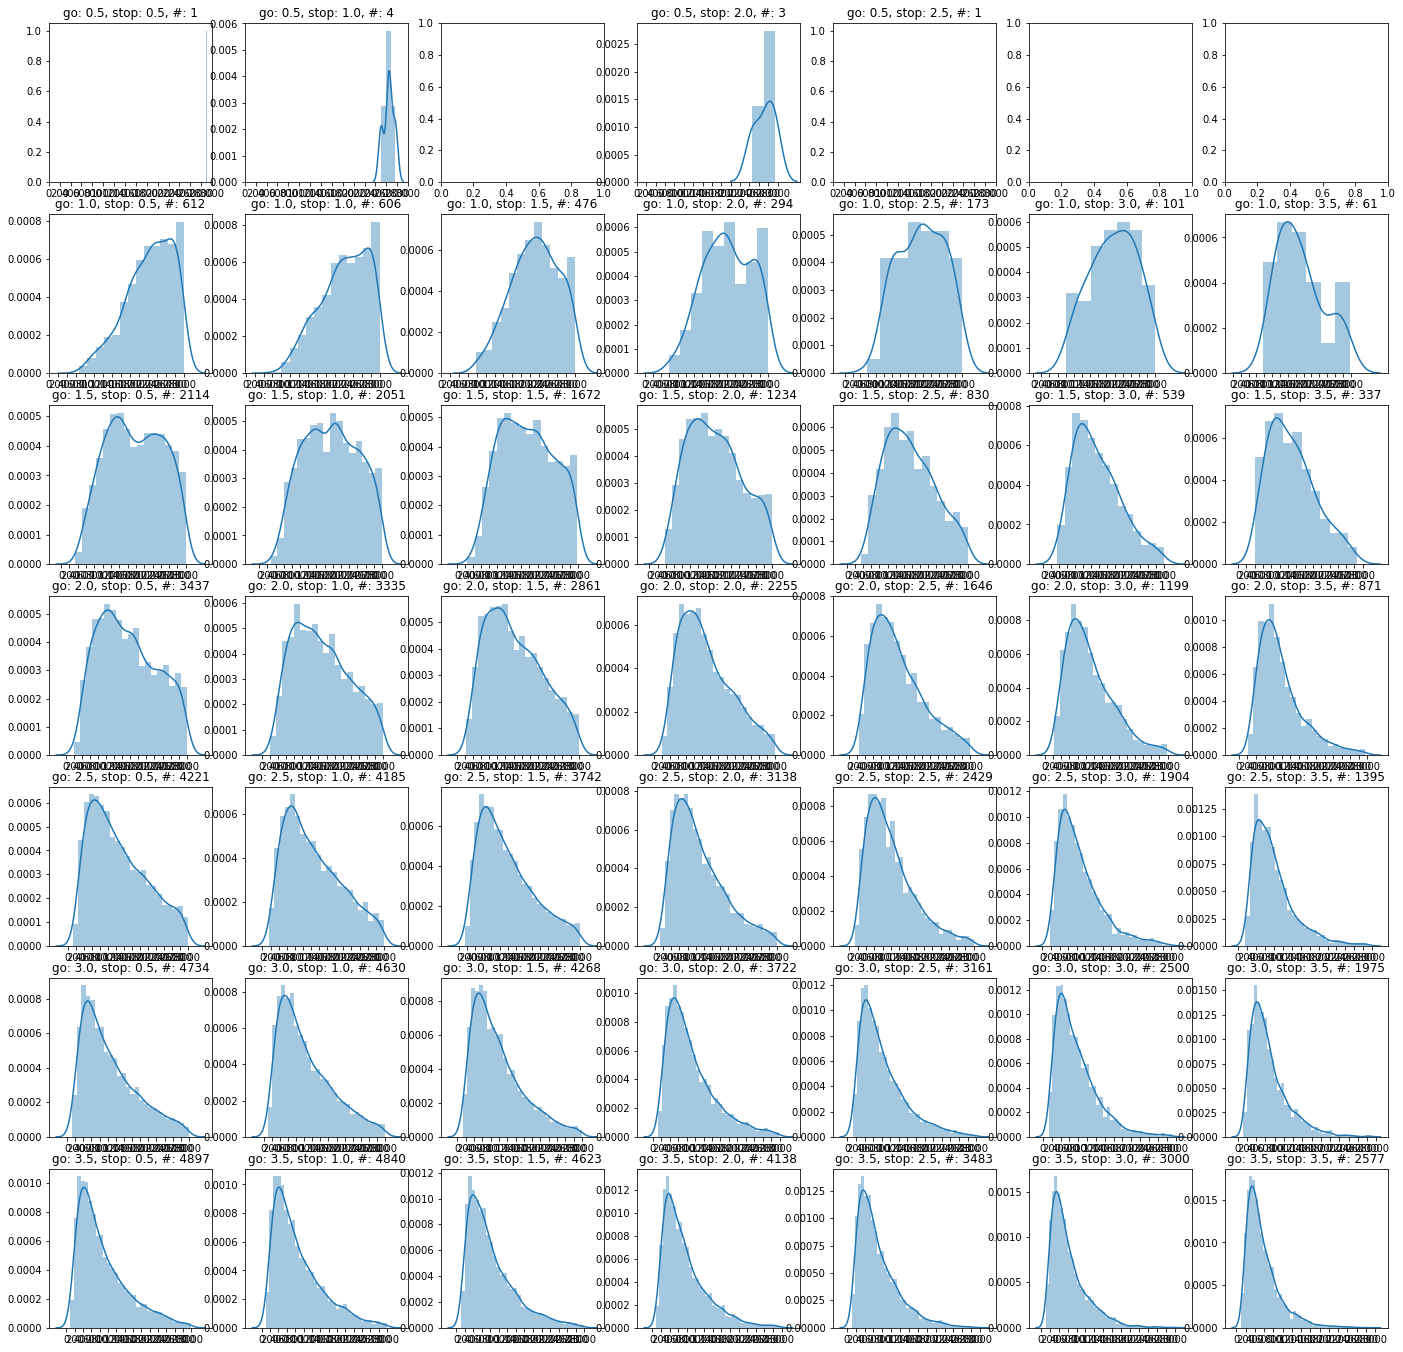

In [11]:
go_noises = np.arange(1, 4, .5)
stop_noises = np.arange(1, 4, .5)

fig, axes = plt.subplots(len(go_noises), len(stop_noises), figsize=(24,24))

for idx_row, noise_go in enumerate(go_noises):
    for idx_col, noise_stop in enumerate(stop_noises):
        # simulate an example w/ mu_go = 0 at this noise threshold
        simulator = SimulateData()
        params = simulator._init_params({'mu_go': 0, 'mu_stop':0,'noise_go': noise_go, 'noise_stop': noise_stop})
        params['n_trials_stop'] = n_ssd0_trials
        params['n_trials_go'] = n_ssd0_trials
        simulator._set_n_trials(params)
        simulator._set_n_guesses(params)  # no guessing is happening

        # STOP TRIALS @ SSD = 0
        stop_dict = simulator._simulate_stop_trials(simulator._init_data_dict(),
                                              params, 0)
        count_stop_rts = np.sum(~np.isnan(stop_dict['RT']))
        if  count_stop_rts > 0:
            sns.distplot(stop_dict['RT'], ax=axes[idx_row, idx_col])
            axes[idx_row, idx_col].set_title("go: %.1f, stop: %.1f, #: %d" % (noise_go, noise_stop, count_stop_rts))
            axes[idx_row, idx_col].set_xticks(np.arange(0, 3200, step=400))

plt.show()
plt.close()

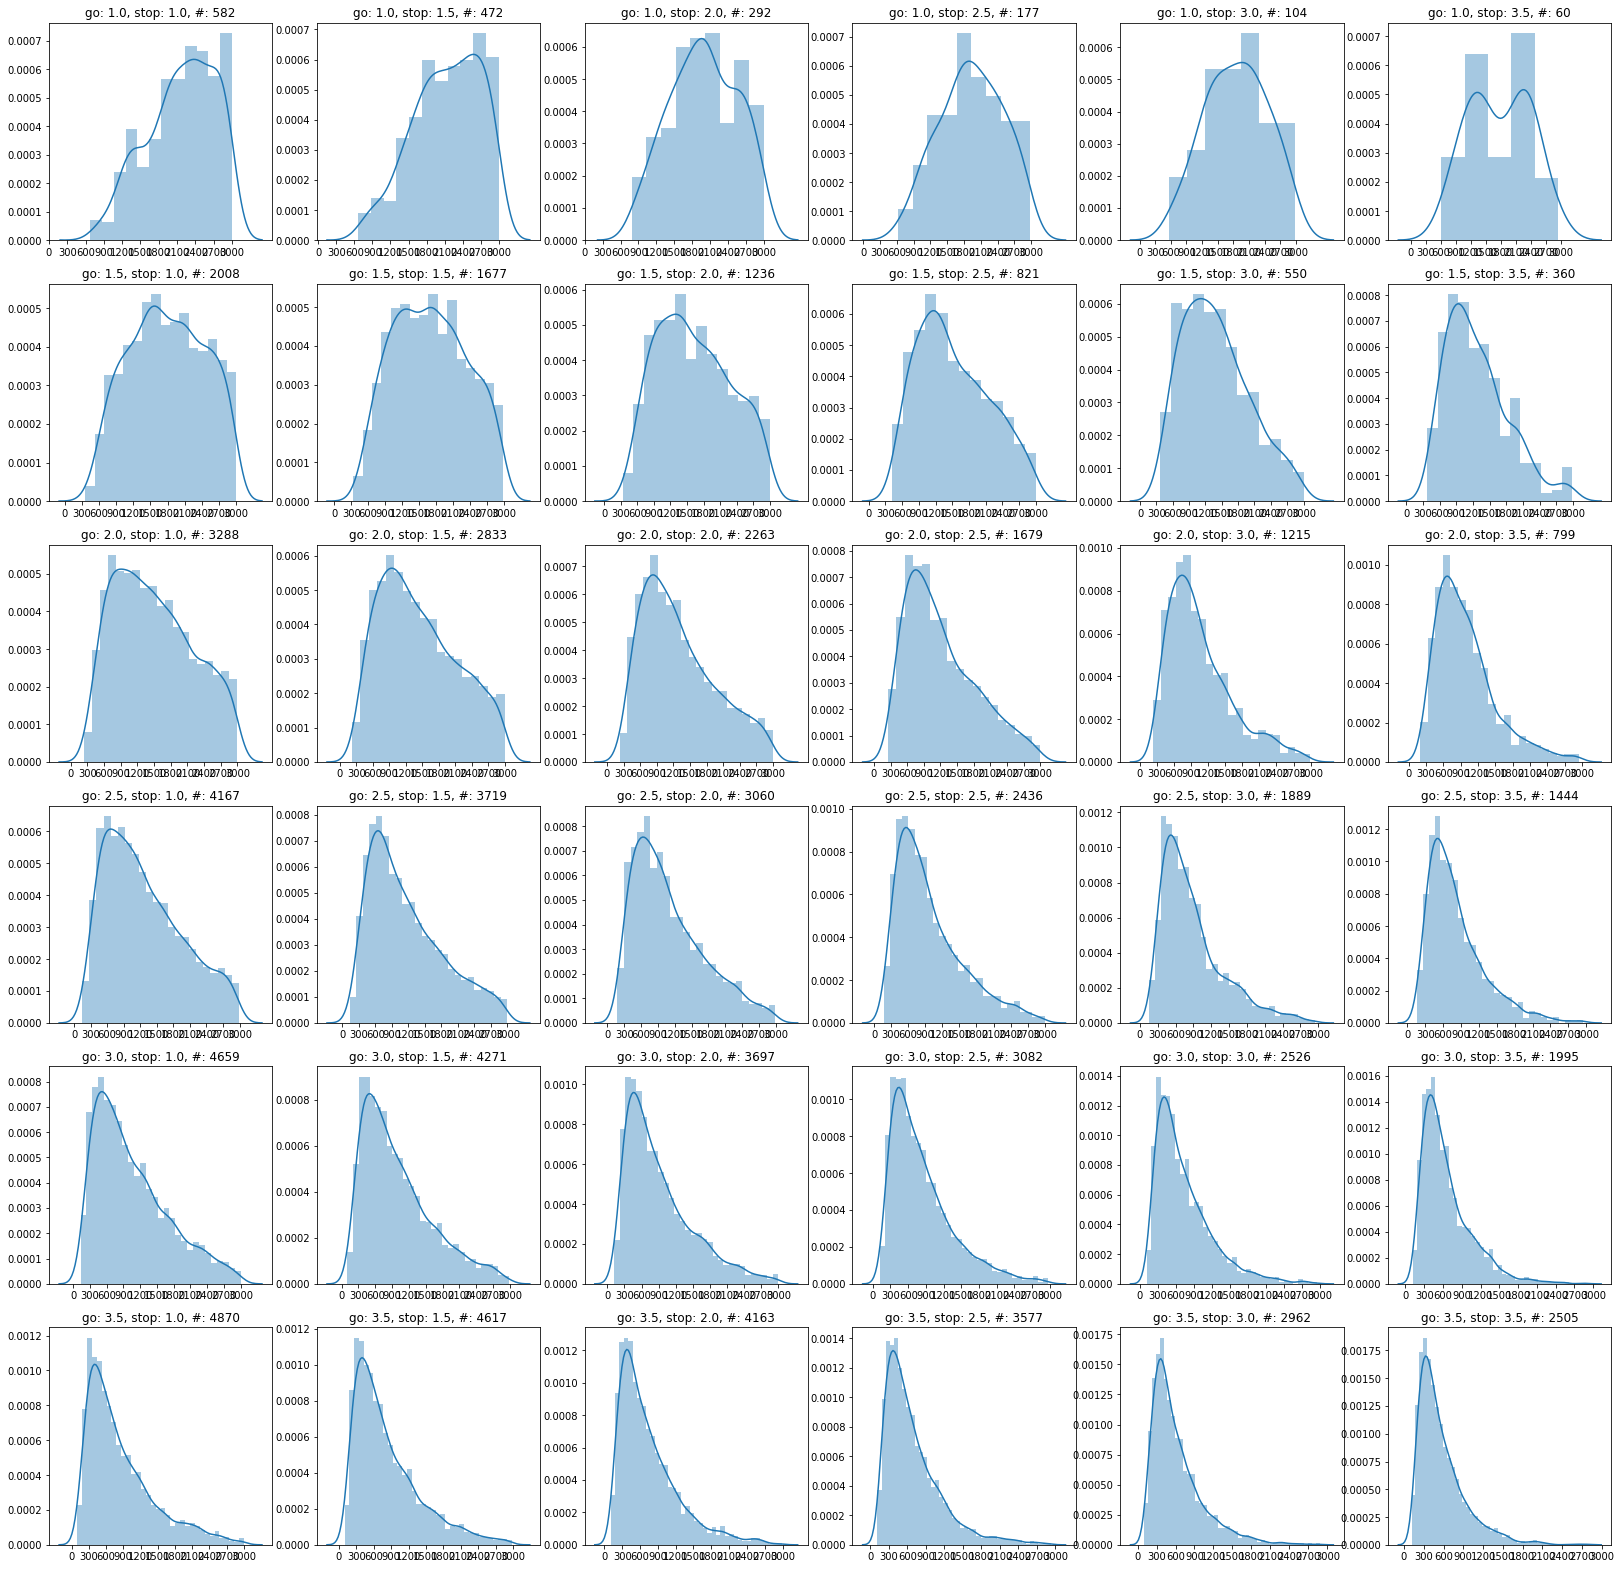

In [12]:
go_noises = np.arange(1, 4, .5)
stop_noises = np.arange(1, 4, .5)

fig, axes = plt.subplots(len(go_noises), len(stop_noises), figsize=(28,28))

for idx_row, noise_go in enumerate(go_noises):
    for idx_col, noise_stop in enumerate(stop_noises):
        # simulate an example w/ mu_go = 0 at this noise threshold
        simulator = SimulateData()
        params = simulator._init_params({'mu_go': 0, 'mu_stop':0,'noise_go': noise_go, 'noise_stop': noise_stop})
        params['n_trials_stop'] = n_ssd0_trials
        params['n_trials_go'] = n_ssd0_trials
        simulator._set_n_trials(params)
        simulator._set_n_guesses(params)  # no guessing is happening

        # STOP TRIALS @ SSD = 0
        stop_dict = simulator._simulate_stop_trials(simulator._init_data_dict(),
                                              params, 0)
        count_stop_rts = np.sum(~np.isnan(stop_dict['RT']))
        if  count_stop_rts > 0:
            sns.distplot(stop_dict['RT'], ax=axes[idx_row, idx_col])
            axes[idx_row, idx_col].set_title("go: %.1f, stop: %.1f, #: %d" % (noise_go, noise_stop, count_stop_rts))
            axes[idx_row, idx_col].set_xticks(np.arange(0, 3200, step=300))

plt.show()
plt.close()

In [16]:
mu_stop = simulator._log_mu_go(.4, 50, max_SSD=550)
mu_go = simulator._log_mu_go(.2, 50, max_SSD=550)

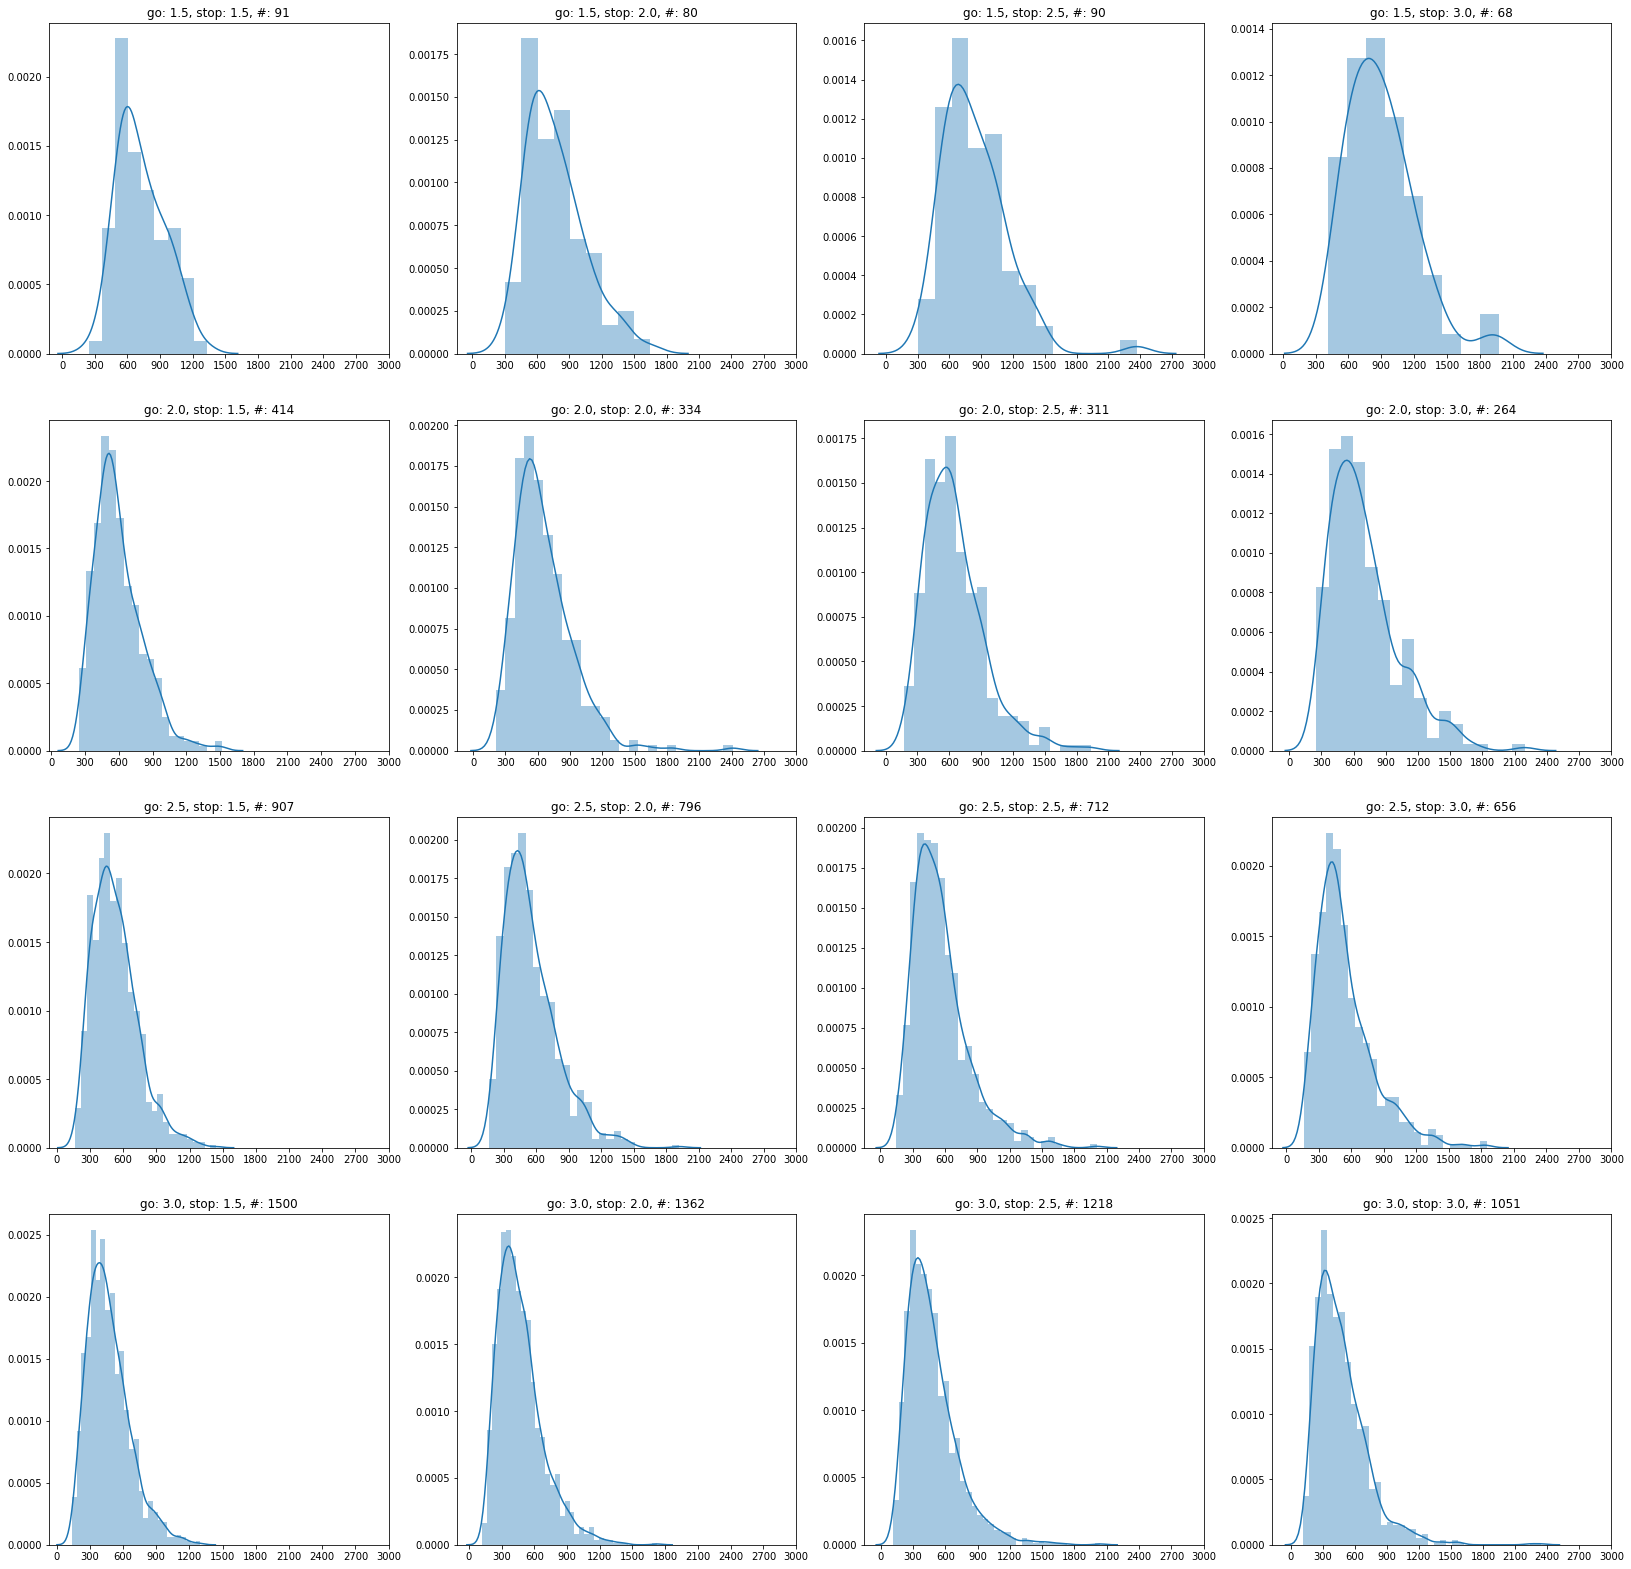

In [17]:
go_noises = np.arange(1.5, 3.5, .5)
stop_noises = np.arange(1.5, 3.5, .5)

fig, axes = plt.subplots(len(go_noises), len(stop_noises), figsize=(28,28))

for idx_row, noise_go in enumerate(go_noises):
    for idx_col, noise_stop in enumerate(stop_noises):
        # simulate an example w/ mu_go = 0 at this noise threshold
        simulator = SimulateData()
        params = simulator._init_params({'mu_go': 0, 'mu_stop':mu_stop,'noise_go': noise_go, 'noise_stop': noise_stop})
        params['n_trials_stop'] = n_ssd0_trials
        params['n_trials_go'] = n_ssd0_trials
        simulator._set_n_trials(params)
        simulator._set_n_guesses(params)  # no guessing is happening

        # STOP TRIALS @ SSD = 0
        stop_dict = simulator._simulate_stop_trials(simulator._init_data_dict(),
                                              params, 0)
        count_stop_rts = np.sum(~np.isnan(stop_dict['RT']))
        if  count_stop_rts > 0:
            sns.distplot(stop_dict['RT'], ax=axes[idx_row, idx_col])
            axes[idx_row, idx_col].set_title("go: %.1f, stop: %.1f, #: %d" % (noise_go, noise_stop, count_stop_rts))
            axes[idx_row, idx_col].set_xticks(np.arange(0, 3200, step=300))

plt.show()
plt.close()

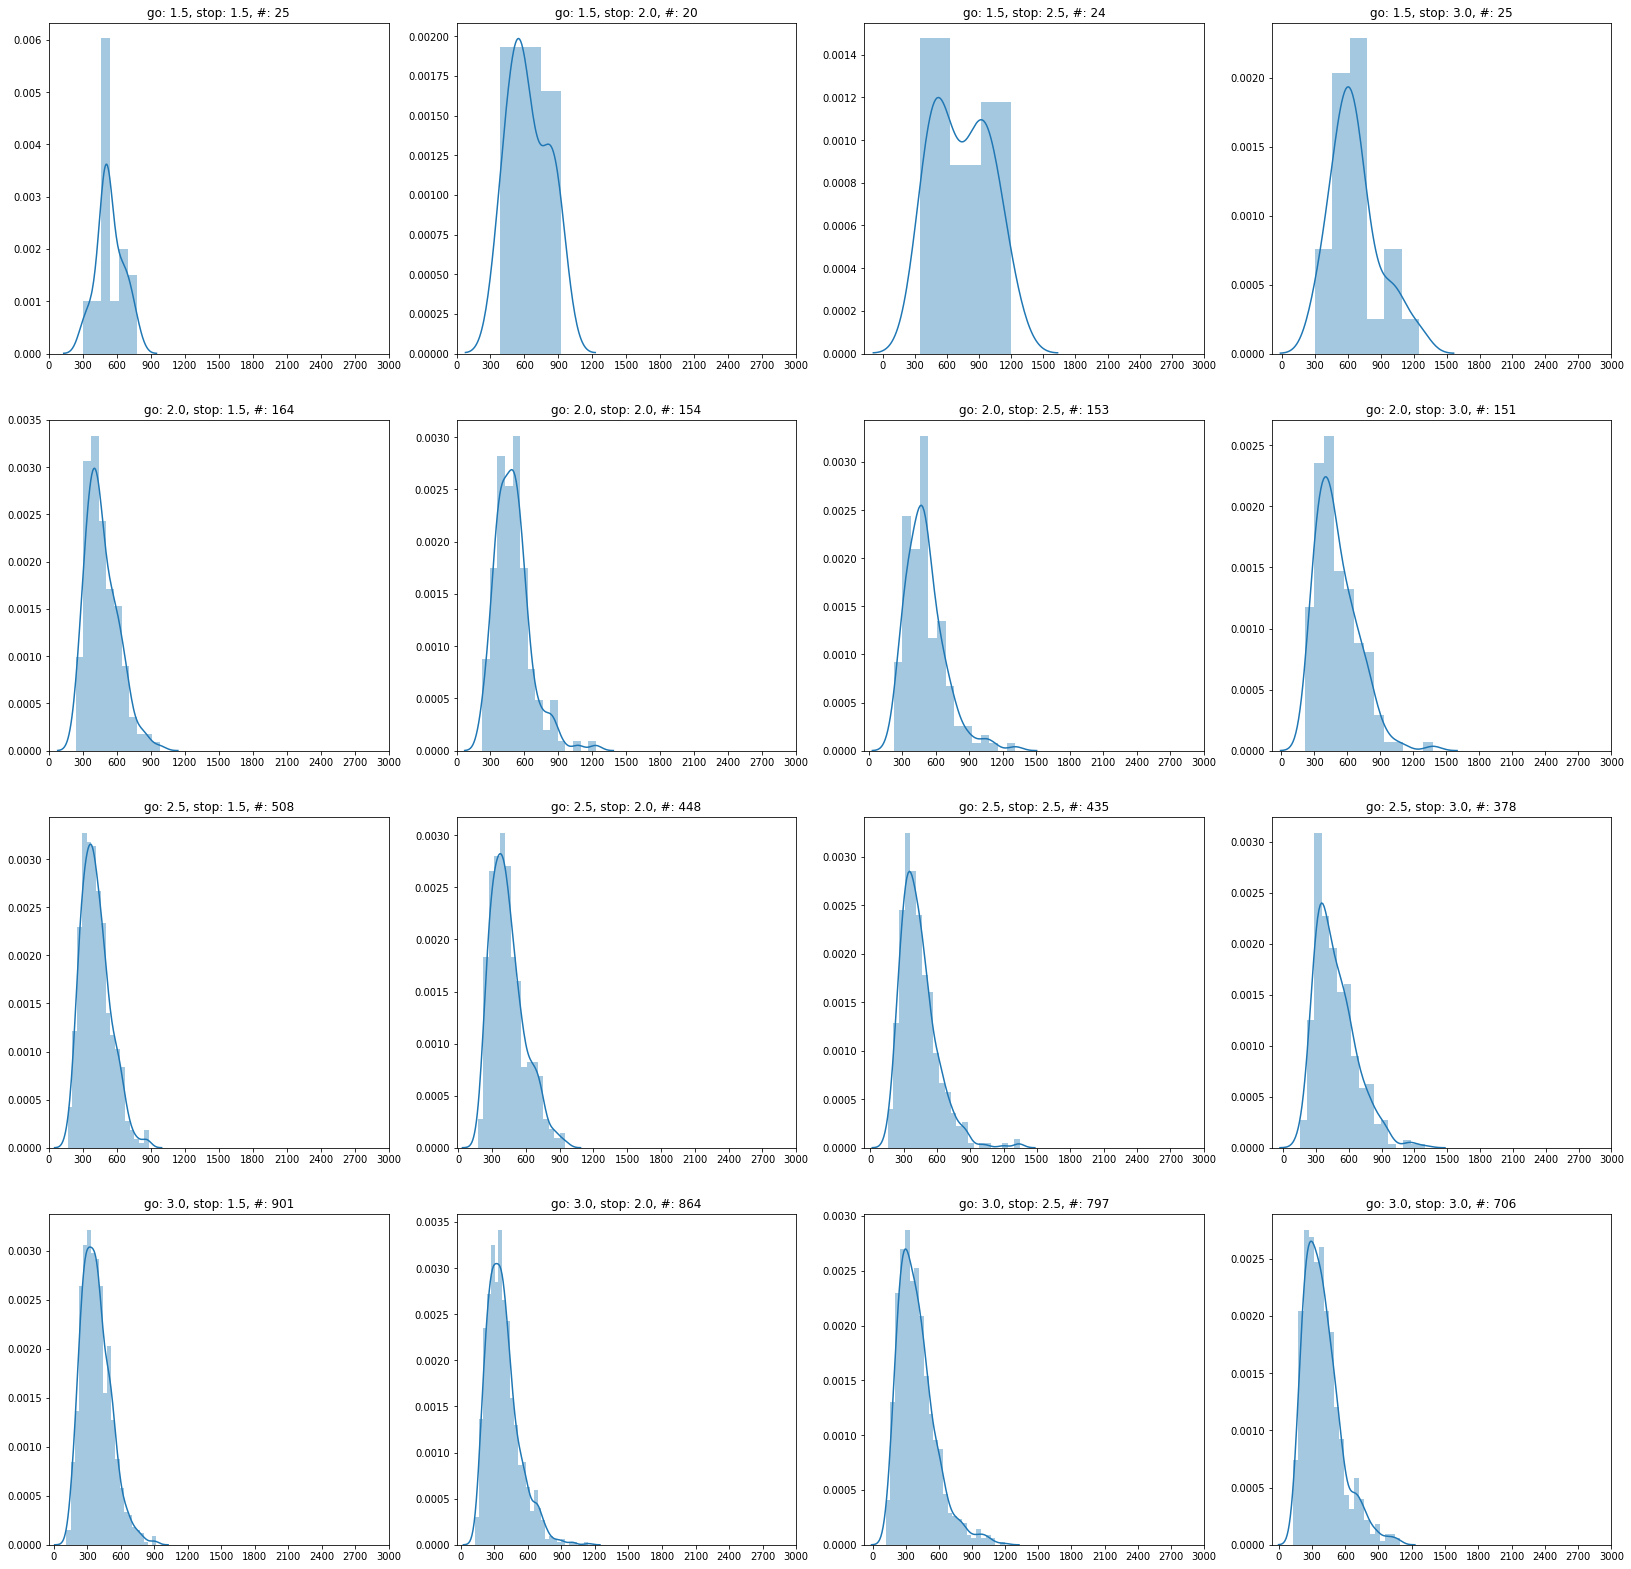

In [18]:
SSD = 100
mu_stop = simulator._log_mu_go(.4, SSD, max_SSD=550)
mu_go = simulator._log_mu_go(.2, SSD, max_SSD=550)

go_noises = np.arange(1.5, 3.5, .5)
stop_noises = np.arange(1.5, 3.5, .5)

fig, axes = plt.subplots(len(go_noises), len(stop_noises), figsize=(28,28))

for idx_row, noise_go in enumerate(go_noises):
    for idx_col, noise_stop in enumerate(stop_noises):
        # simulate an example w/ mu_go = 0 at this noise threshold
        simulator = SimulateData()
        params = simulator._init_params({'mu_go': 0, 'mu_stop':mu_stop,'noise_go': noise_go, 'noise_stop': noise_stop})
        params['n_trials_stop'] = n_ssd0_trials
        params['n_trials_go'] = n_ssd0_trials
        simulator._set_n_trials(params)
        simulator._set_n_guesses(params)  # no guessing is happening

        # STOP TRIALS @ SSD = 0
        stop_dict = simulator._simulate_stop_trials(simulator._init_data_dict(),
                                              params, 0)
        count_stop_rts = np.sum(~np.isnan(stop_dict['RT']))
        if  count_stop_rts > 0:
            sns.distplot(stop_dict['RT'], ax=axes[idx_row, idx_col])
            axes[idx_row, idx_col].set_title("go: %.1f, stop: %.1f, #: %d" % (noise_go, noise_stop, count_stop_rts))
            axes[idx_row, idx_col].set_xticks(np.arange(0, 3200, step=300))

plt.show()
plt.close()